In [17]:
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

## Preparing Data
60% training, 20% validation, and 20% testing

In [40]:
# TODO: Move these two functions to a shared file for helper functions
def unPickleData(filename):
  with open(filename,'rb') as f: arr = pickle.load(f)
  return arr

def getDataPath(dirname,filename):
  return os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)),"processed_data", dirname,filename)

x_data = unPickleData(getDataPath("comments","X_comments_sub.pkl"))
y_data = unPickleData(getDataPath("comments","Y_comments_sub.pkl"))

n = len(x_data)
x_data_training = x_data[:int(0.6*n)]
x_data_validation = x_data[int(0.6*n):int(0.8*n)]
x_data_testing = x_data[int(0.8*n):]

y_data_training = y_data[:int(0.6*n)]
y_data_validation = y_data[int(0.6*n):int(0.8*n)]
y_data_testing = y_data[int(0.8*n):]

## Training

In [41]:
model_lin = SVC(kernel="linear")
model_lin.fit(x_data_training, y_data_training)

SVC(kernel='linear')

## Learning Curve for Linear SVM

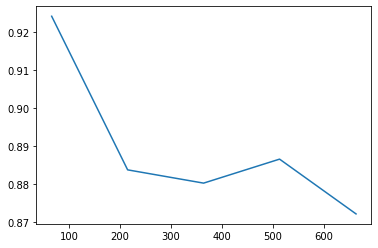

In [42]:
train_sizes, train_scores, test_scores = sklearn.model_selection.learning_curve(model_lin,x_data_training,y_data_training)
plt.plot(train_sizes,np.mean(train_scores,axis=1))

In [43]:
model_poly = SVC(kernel="poly")
model_poly.fit(x_data_training, y_data_training)

SVC(kernel='poly')

## Learning Curve for Polynomial SVM

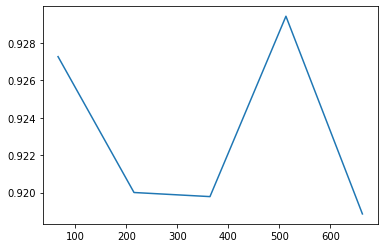

In [44]:
train_sizes, train_scores, test_scores = sklearn.model_selection.learning_curve(model_poly,x_data_training,y_data_training)
plt.plot(train_sizes,np.mean(train_scores,axis=1))

## Model Selection

In [45]:
grid = {"C":np.logspace(-3,3,100)}

search = GridSearchCV(model_lin,grid,cv=10)
search.fit(x_data_validation,y_data_validation)

print("Tuned hpyerparameters :(best parameters) ",search.best_params_)
print("Accuracy :",search.best_score_)

best_model_lin = search.best_estimator_

Tuned hpyerparameters :(best parameters)  {'C': 1.629750834620645}
Accuracy : 0.8624338624338623


In [46]:
grid = {'C':np.logspace(-3,3,10), 'degree':[1,2,3,4,5], 'gamma':['scale', 'auto'], 'coef0':np.logspace(0,1,10)}

search = GridSearchCV(model_poly,grid,cv=10)
search.fit(x_data_validation,y_data_validation)

print("Tuned hpyerparameters :(best parameters) ",search.best_params_)
print("Accuracy :",search.best_score_)

best_model_poly = search.best_estimator_

Tuned hpyerparameters :(best parameters)  {'C': 0.004641588833612777, 'coef0': 2.7825594022071245, 'degree': 5, 'gamma': 'scale'}
Accuracy : 0.8697089947089948


## Testing

### Excluding the validation set

In [47]:
y_pred = best_model_lin.predict(x_data_testing)

print(sklearn.metrics.classification_report(y_data_testing,y_pred))
print("Accuracy: ", sklearn.metrics.accuracy_score(y_data_testing, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       229
           1       0.80      0.25      0.38        48

    accuracy                           0.86       277
   macro avg       0.83      0.62      0.65       277
weighted avg       0.85      0.86      0.83       277

Accuracy:  0.8592057761732852


In [48]:
y_pred = best_model_poly.predict(x_data_testing)

print(sklearn.metrics.classification_report(y_data_testing,y_pred))
print("Accuracy: ", sklearn.metrics.accuracy_score(y_data_testing, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       229
           1       0.82      0.29      0.43        48

    accuracy                           0.87       277
   macro avg       0.85      0.64      0.68       277
weighted avg       0.86      0.87      0.84       277

Accuracy:  0.8664259927797834


### Including the validation set
Because of the lack of representation of the class "bot", especially in the testing data, the model reflects poor results when it comes to the recall and f-score.

In [49]:
y_pred = best_model_lin.predict(np.concatenate((x_data_testing,x_data_validation))
)
print(sklearn.metrics.classification_report(np.concatenate((y_data_testing,y_data_validation)),y_pred))
print("Accuracy: ", sklearn.metrics.accuracy_score(np.concatenate((y_data_testing,y_data_validation)), y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       459
           1       0.93      0.43      0.58        94

    accuracy                           0.90       553
   macro avg       0.91      0.71      0.76       553
weighted avg       0.90      0.90      0.88       553

Accuracy:  0.8969258589511754


In [50]:
y_pred = best_model_poly.predict(np.concatenate((x_data_testing,x_data_validation))
)
print(sklearn.metrics.classification_report(np.concatenate((y_data_testing,y_data_validation)),y_pred))
print("Accuracy: ", sklearn.metrics.accuracy_score(np.concatenate((y_data_testing,y_data_validation)), y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       459
           1       0.92      0.50      0.65        94

    accuracy                           0.91       553
   macro avg       0.91      0.75      0.80       553
weighted avg       0.91      0.91      0.90       553

Accuracy:  0.9077757685352622
